<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [9]:
# Importer les bibliothèques nécessaires
import sqlite3
import pandas as pd

# Chemin vers la base de données SQLite
db_path = "data/chinook.db"

# Connexion à la base de données
conn = sqlite3.connect(db_path)

# Requête SQL pour trouver le genre avec la durée moyenne la plus longue
query = """
SELECT 
    g.Name AS GenreName,
    AVG(t.Milliseconds) / 1000.0 AS AverageSongLengthSeconds
FROM 
    genres g
JOIN 
    tracks t 
    ON g.GenreId = t.GenreId
GROUP BY 
    g.GenreId
ORDER BY 
    AverageSongLengthSeconds DESC
LIMIT 1;
"""

# Exécuter la requête et charger les résultats dans un DataFrame pandas
result = pd.read_sql_query(query, conn)

# Afficher les résultats
print("Genre avec la durée moyenne la plus longue :")
print(result)

# Fermer la connexion
conn.close()


Genre avec la durée moyenne la plus longue :
          GenreName  AverageSongLengthSeconds
0  Sci Fi & Fantasy               2911.783038


## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [2]:
import pandas as pd
import sqlite3

# 1. Ingestion des données

# Charger les données depuis le fichier Excel
excel_data = pd.read_excel('data/chinook_data.xlsx')

# Charger les données depuis le fichier CSV
csv_data = pd.read_csv('data/chinook_data.csv')

# Charger les données depuis la base de données SQLite
conn = sqlite3.connect('data/chinook.db')
query = "SELECT * FROM artists;"  # Remplacez "artists" par le nom de la table si nécessaire
sqlite_data = pd.read_sql(query, conn)
conn.close()

# 2. Analyse exploratoire des données (EDA)

# Aperçu des premières lignes des données
print("Aperçu des données depuis Excel:")
print(excel_data.head())

print("Aperçu des données depuis CSV:")
print(csv_data.head())

print("Aperçu des données depuis SQLite:")
print(sqlite_data.head())

# Informations générales sur les données (types et nombre de valeurs non-nulles)
print("\nInformations sur les données depuis Excel:")
print(excel_data.info())

print("\nInformations sur les données depuis CSV:")
print(csv_data.info())

print("\nInformations sur les données depuis SQLite:")
print(sqlite_data.info())

# Statistiques descriptives pour les colonnes numériques
print("\nStatistiques descriptives pour Excel:")
print(excel_data.describe())

print("\nStatistiques descriptives pour CSV:")
print(csv_data.describe())

print("\nStatistiques descriptives pour SQLite:")
print(sqlite_data.describe())

# Vérification des valeurs manquantes
print("\nValeurs manquantes dans Excel:")
print(excel_data.isnull().sum())

print("\nValeurs manquantes dans CSV:")
print(csv_data.isnull().sum())

print("\nValeurs manquantes dans SQLite:")
print(sqlite_data.isnull().sum())

# 3. Nettoyage des données

# Sélectionner uniquement les colonnes numériques avant de remplir les valeurs manquantes
excel_data_numeric = excel_data.select_dtypes(include=['number'])
csv_data_numeric = csv_data.select_dtypes(include=['number'])
sqlite_data_numeric = sqlite_data.select_dtypes(include=['number'])

# Remplir les valeurs manquantes par la moyenne des colonnes numériques
excel_data[excel_data_numeric.columns] = excel_data_numeric.fillna(excel_data_numeric.mean())
csv_data[csv_data_numeric.columns] = csv_data_numeric.fillna(csv_data_numeric.mean())
sqlite_data[sqlite_data_numeric.columns] = sqlite_data_numeric.fillna(sqlite_data_numeric.mean())

# Suppression des doublons
excel_data = excel_data.drop_duplicates()
csv_data = csv_data.drop_duplicates()
sqlite_data = sqlite_data.drop_duplicates()

# 4. Sauvegarde des données nettoyées dans un fichier Excel bien structuré

# Sauvegarder dans un fichier Excel avec plusieurs feuilles pour chaque source
with pd.ExcelWriter('cleaned_chinook_data.xlsx') as writer:
    # Sauvegarder chaque DataFrame dans une feuille différente
    excel_data.to_excel(writer, sheet_name='Excel Data', index=False)
    csv_data.to_excel(writer, sheet_name='CSV Data', index=False)
    sqlite_data.to_excel(writer, sheet_name='SQLite Data', index=False)

print("\nDonnées nettoyées sauvegardées dans 'cleaned_chinook_data.xlsx'.")


Aperçu des données depuis Excel:
                  Track                                    Composer  \
0  My Time After Awhile  Robert Geddins/Ron Badger/Sheldon Feinberg   
1   Be Quick Or Be Dead                 Bruce Dickinson/Janick Gers   
2           Água E Fogo   Chico Amaral/Edgard Scandurra/Samuel Rosa   
3            Ozone Baby                    Jimmy Page, Robert Plant   
4            Bop Boogie                                         NaN   

   Milliseconds    Bytes  UnitPrice  Genre  \
0        182491  6022698       0.99  Blues   
1        204512  8181888       0.99   Rock   
2        278987  9272272       0.99   Rock   
3        215954  7079588       0.99   Rock   
4        189596  6093124       0.99   Jazz   

                                              Album        Artist  
0  The Best Of Buddy Guy - The Millenium Collection     Buddy Guy  
1                                  Fear Of The Dark   Iron Maiden  
2                                       Maquinarama        

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-01-01` to `2024-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [30]:
#Your Solution

import json
import yfinance as yf

#qstt1
with open('data/bitcoin_price.json') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)

print('qst2')
#qst2
btc_yf_df = yf.download('BTC-USD',
                   start='2020-01-01', 
                   end='2024-10-31',
                   interval='1d'
                  )
print(btc_df_jsn.head(5))
print(btc_yf_df.head(5))

print("Columns in JSON DataFrame:", btc_df_jsn.columns)
print("Columns in Yahoo DataFrame:", btc_yf_df.columns)
#qst3
print("Columns in JSON DataFrame:", btc_df_jsn.columns)
btc_df_jsn.rename(columns={'time':'Date'}, inplace=True) #old val , new value 
print("Columns in JSON DataFrame:", btc_df_jsn.columns)
btc_df_jsn['Date'] = pd.to_datetime(btc_df_jsn['Date'], unit='ms')
print("Columns in JSON DataFrame:", btc_yf_df.columns)
btc_df_jsn.set_index('Date', inplace=True)
print(btc_yf_df.columns.nlevels)
btc_yf_df.columns = btc_yf_df.columns.droplevel(1)
btc_yf_df.rename(columns={column: column.lower() for column in btc_yf_df.columns}, inplace=True)
btc_yf_df.head(10)
print("Columns in JSON DataFrame:", btc_df_jsn.columns)
print("Columns in Yahoo DataFrame:", btc_yf_df.columns)
btc_yf_df.head(10)




[*********************100%***********************]  1 of 1 completed

qst2
   symbol           time        open       close       high        low  \
0  btcusd  1364688000000   92.500000   93.033000   93.74999   91.00000   
1  btcusd  1364774400000   93.250000  103.999000  105.90000   92.49999   
2  btcusd  1364860800000  104.000000  118.229354  118.38670   99.00000   
3  btcusd  1364947200000  117.958261  134.700000  146.88000  101.51088   
4  btcusd  1365033600000  134.716560  132.899000  143.00000  119.00000   

         volume  
0   3083.079791  
1   5224.401313  
2   8376.527478  
3  12996.245072  
4   6981.668305  
Price                        Adj Close        Close         High          Low  \
Ticker                         BTC-USD      BTC-USD      BTC-USD      BTC-USD   
Date                                                                            
2020-01-01 00:00:00+00:00  7200.174316  7200.174316  7254.330566  7174.944336   
2020-01-02 00:00:00+00:00  6985.470215  6985.470215  7212.155273  6935.270020   
2020-01-03 00:00:00+00:00  7344.88427

Price,adj close,close,high,low,open,volume
Date,,,,,,
2020-01-01 00:00:00+00:00,7200.174316,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02 00:00:00+00:00,6985.470215,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03 00:00:00+00:00,7344.884277,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04 00:00:00+00:00,7410.656738,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05 00:00:00+00:00,7411.317383,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
2020-01-06 00:00:00+00:00,7769.219238,7769.219238,7781.867188,7409.292969,7410.452148,23276261598
2020-01-07 00:00:00+00:00,8163.692383,8163.692383,8178.215820,7768.227539,7768.682129,28767291327
2020-01-08 00:00:00+00:00,8079.862793,8079.862793,8396.738281,7956.774414,8161.935547,31672559265
2020-01-09 00:00:00+00:00,7879.071289,7879.071289,8082.295898,7842.403809,8082.295898,24045990466


In [31]:
#qst 4
combined_df = pd.concat([btc_df_jsn , btc_yf_df], axis=0, ignore_index=False)
print(combined_df)


                           symbol          open         close          high  \
Date                                                                          
2013-03-31 00:00:00        btcusd     92.500000     93.033000     93.749990   
2013-04-01 00:00:00        btcusd     93.250000    103.999000    105.900000   
2013-04-02 00:00:00        btcusd    104.000000    118.229354    118.386700   
2013-04-03 00:00:00        btcusd    117.958261    134.700000    146.880000   
2013-04-04 00:00:00        btcusd    134.716560    132.899000    143.000000   
...                           ...           ...           ...           ...   
2024-10-26 00:00:00+00:00     NaN  66628.734375  67014.695312  67317.921875   
2024-10-27 00:00:00+00:00     NaN  67023.476562  67929.296875  68221.312500   
2024-10-28 00:00:00+00:00     NaN  67922.671875  69907.757812  70212.265625   
2024-10-29 00:00:00+00:00     NaN  69910.046875  72720.492188  73577.210938   
2024-10-30 00:00:00+00:00     NaN  72715.367188  723

C:\Users\Hibetelrahmane\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


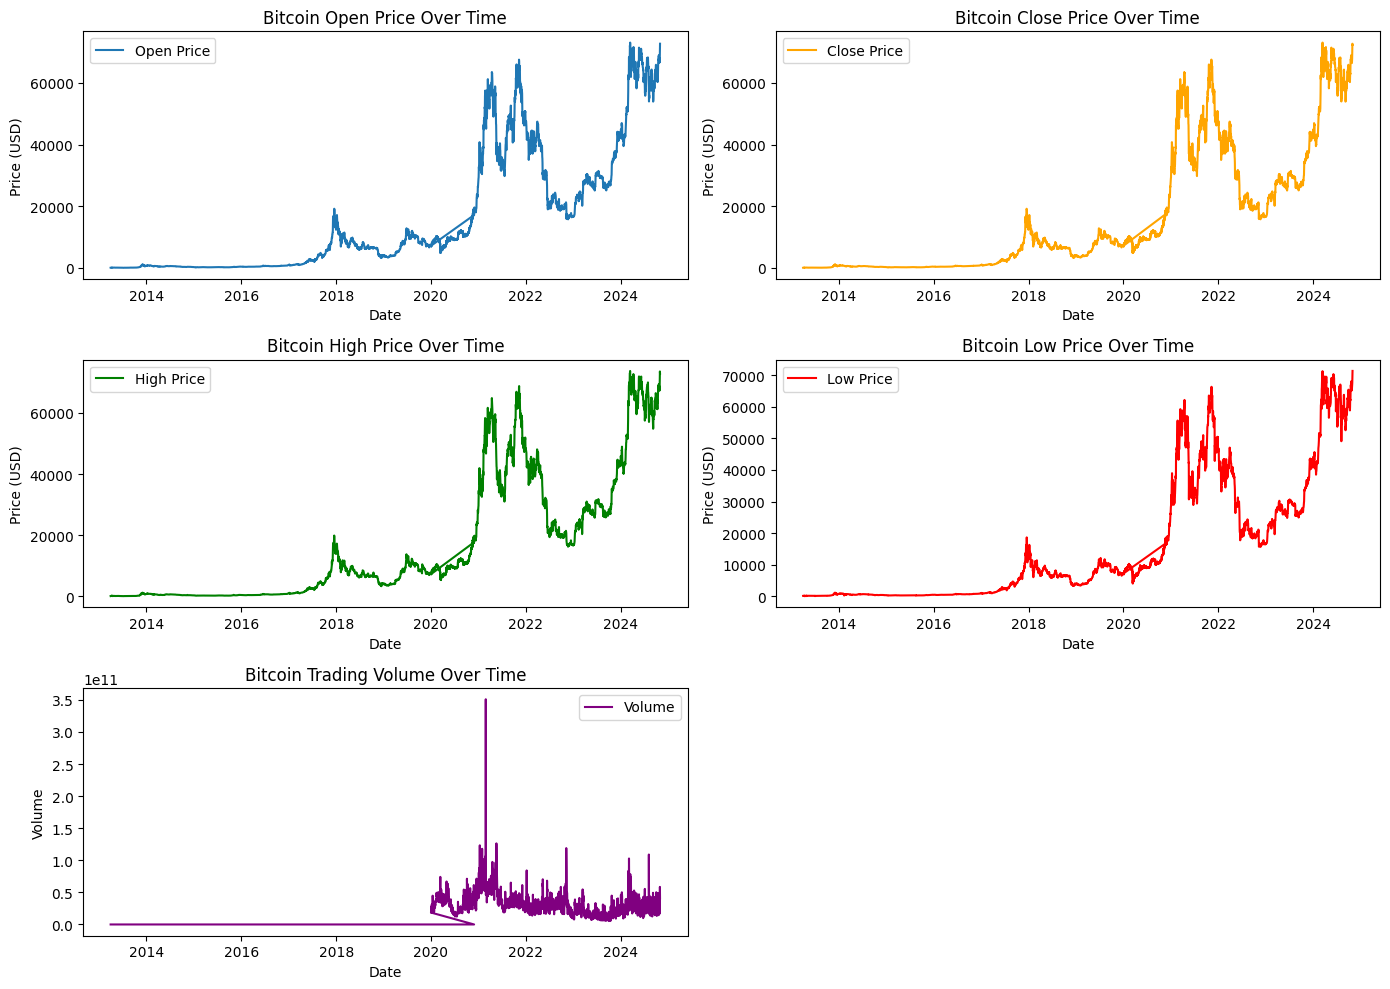

,open,close,high,low,volume,adj close
open,1.000000,0.999102,0.999596,0.999340,0.691171,0.997701
close,0.999102,1.000000,0.999612,0.999521,0.689995,1.000000
high,0.999596,0.999612,1.000000,0.999208,0.695562,0.999019
low,0.999340,0.999521,0.999208,1.000000,0.682923,0.998785
volume,0.691171,0.689995,0.695562,0.682923,1.000000,0.166768
adj close,0.997701,1.000000,0.999019,0.998785,0.166768,1.000000


In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(combined_df.index, combined_df['open'], label='Open Price')
plt.title('Bitcoin Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(combined_df.index, combined_df['close'], label='Close Price', color='orange')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(combined_df.index, combined_df['high'], label='High Price', color='green')
plt.title('Bitcoin High Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(combined_df.index, combined_df['low'], label='Low Price', color='red')
plt.title('Bitcoin Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(combined_df.index, combined_df['volume'], label='Volume', color='purple')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()



correlation_matrix = combined_df.select_dtypes(include = 'number').corr()
correlation_matrix

In [34]:
nan_summary = combined_df.isna().sum()
print(nan_summary)

cleaned_df = combined_df.drop(columns=['adj close', 'symbol'], errors='ignore')

cleaned_df.to_csv(r'cleaned_bitcoin_data.csv', index=True)


symbol       1765
open            0
close           0
high            0
low             0
volume          0
adj close    2793
dtype: int64
